In [1]:
#imports
import pandas as pd
import glob
import re 
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('/scratch/user/ingl0055/CFhackathon/amrfinder/magamrs/*')
counter = 0

amr_df = pd.DataFrame() 

for f in files: 
    
    df = pd.read_csv(f, sep='\t')
    df['MAG'] = [re.split('/',f)[-1] for i in range(len(df))] 
    
    if counter == 0:
        amr_df = df 
    else: 
        amr_df = pd.concat([amr_df, df],axis=0)
        
    counter += 1 

In [4]:
#read in the species of each bin 
mag_details = pd.read_csv('/home/grig0076/CF_hackathon/AMR_Mags.csv')
class_dict = dict(zip(mag_details['user_genome'], mag_details['classification']))

In [5]:
amr_df['Classification'] = [class_dict.get(i) for i in [re.split('\.', j)[0] for j in amr_df['MAG']]]

In [6]:
amr_df.to_csv('amr_present_in_MAG_fasta.tsv', sep = '\t')

In [7]:
amr_df

,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,Element subtype,...,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description,MAG,Classification
0,NaN,contig_189,15466,16581,+,mef(A),macrolide efflux MFS transporter Mef(A),core,AMR,AMR,...,405,91.85,100.00,372,WP_000417519.1,macrolide efflux MFS transporter Mef(A),NaN,NaN,bin_101.fasta.amr.tsv,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
0,NaN,contig_195,10626,11840,+,mef(A),macrolide efflux MFS transporter Mef(A),core,AMR,AMR,...,405,100.00,100.00,405,WP_000417519.1,macrolide efflux MFS transporter Mef(A),NaN,NaN,bin_103.fasta.amr.tsv,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
1,NaN,contig_195,23234,24448,+,mef(A),macrolide efflux MFS transporter Mef(A),core,AMR,AMR,...,402,100.00,98.77,405,WP_063853705.1,macrolide efflux MFS transporter Mef(A),NaN,NaN,bin_103.fasta.amr.tsv,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
2,NaN,contig_4441,20746,22212,+,tetA(46),tetracycline efflux ABC transporter Tet(46) su...,core,AMR,AMR,...,574,85.19,94.27,489,WP_063856469.1,tetracycline efflux ABC transporter Tet(46) su...,NaN,NaN,bin_103.fasta.amr.tsv,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
3,NaN,contig_4441,22217,23155,+,tetB(46),tetracycline efflux ABC transporter Tet(46) su...,core,AMR,AMR,...,578,54.15,99.04,313,WP_048717443.1,tetracycline efflux ABC transporter Tet(46) su...,NaN,NaN,bin_103.fasta.amr.tsv,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,contig_4881,1928,2575,+,catA,type A-9 chloramphenicol O-acetyltransferase,core,AMR,AMR,...,216,100.00,100.00,216,WP_001010387.1,type A-9 chloramphenicol O-acetyltransferase,NaN,NaN,bin_87.fasta.amr.tsv,d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphy...
0,NaN,contig_10585,2139,5105,+,mupA,mupirocin-resistant isoleucine--tRNA ligase MupA,core,AMR,AMR,...,1024,96.68,95.45,990,WP_000163435.1,mupirocin-resistant isoleucine--tRNA ligase MupA,NaN,NaN,bin_88.fasta.amr.tsv,d__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f...
0,NaN,contig_3954,37216,37749,-,aac(6')-Im,aminoglycoside N-acetyltransferase AAC(6')-Im,core,AMR,AMR,...,178,100.00,100.00,178,WP_010708502.1,aminoglycoside N-acetyltransferase AAC(6')-Im,NaN,NaN,bin_96.fasta.amr.tsv,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
1,NaN,contig_3954,37796,38692,-,aph(2'')-IIa,aminoglycoside O-phosphotransferase APH(2'')-IIa,core,AMR,AMR,...,299,100.00,99.67,299,WP_016439437.1,aminoglycoside O-phosphotransferase APH(2'')-IIa,NaN,NaN,bin_96.fasta.amr.tsv,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...


In [8]:
amr_df['MAG_bin'] = [re.split('\.',i)[0] for i in amr_df['MAG']]
amr_df = amr_df.reset_index()
amr_df['MAG with species'] = [amr_df['MAG_bin'][i] + ' ' + amr_df['Classification'][i] for i in range(len(amr_df))] 

In [9]:
presence_absence = pd.get_dummies(amr_df.set_index('MAG with species')['Gene symbol']).groupby(level=0).sum().reset_index()
presence_absence = presence_absence.set_index('MAG with species')
presence_absence.index = [re.split(';', i)[5][3:] + '_' + re.split(' ', re.split(';', i)[0])[0] for i in presence_absence.index.to_list()]

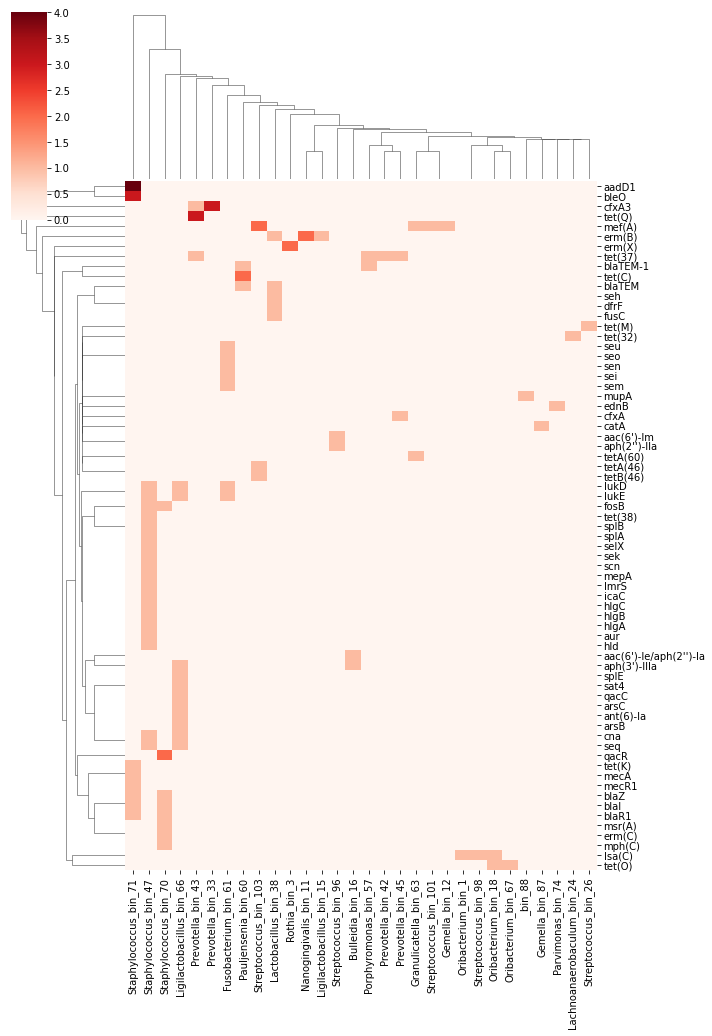

In [10]:
g = sns.clustermap(presence_absence.T, cmap = 'Reds', yticklabels=True, xticklabels=True)
g.fig.set_size_inches(10,16)
plt.savefig('MAG_AMR.png')

In [11]:
presence_absence.to_csv('presence_absence_MAG_AMR.csv')

In [12]:
#make the minion amr finder plus into a long table which we can read into other software 

In [13]:
amr_finder_minion = glob.glob('/scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/*')

In [14]:
long_amrplus = pd.DataFrame() 
counter = 0 

for a in amr_finder_minion: 
    df = pd.DataFrame()
    
    try: 
        df = pd.read_csv(a, sep = '\t')
    except pd.errors.EmptyDataError:
        print('df is empty: ' + a)
    
     # add extra column to describe which sample 
    df['sample'] = [re.split('/',a)[-1][:-4] for i in range(len(df))]
    
    if counter == 0: 
        long_amrplus = df
    else: 
        long_amrplus = pd.concat([long_amrplus, df])
    
    counter += 1 

df is empty: /scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/1255498_20171212_fasta.amr.tsv
df is empty: /scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/1282052_20180206_fasta.amr.tsv
df is empty: /scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/1447437_20171006_fasta.amr.tsv
df is empty: /scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/1470026_20180502_fasta.amr.tsv
df is empty: /scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/1586713_20180309_fasta.amr.tsv
df is empty: /scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/1593973_20180504_fasta.amr.tsv
df is empty: /scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/1845116_20180403_fasta.amr.tsv
df is empty: /scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/639354_20171206__fasta.amr.tsv
df is empty: /scratch/user/ingl0055/CFhackathon/amrfinder/amroutput/fasta_amr/642660_20180601__fasta.amr.tsv
df is empty: /scrat

In [15]:
long_amrplus.to_csv('amrfinderplus_minion_longform.csv')


In [16]:
all_samples = list(set(long_amrplus.index))
amr_sample = pd.DataFrame() 
counter = 0 

for s in all_samples: 
    
    amr = long_amrplus.loc[s]['Gene symbol']
    
    if type(amr) is str: 
        count_df = pd.DataFrame.from_dict({amr:1}, orient='index')
        
    else: 
        count = Counter(amr)
        count_df = pd.DataFrame.from_dict(count, orient='index')
        
    count_df.columns = [s]
    
    if counter == 0: 
        amr_sample=count_df
    else: 
        amr_sample = pd.concat([amr_sample, count_df],axis=1)
    
    counter += 1 
    
amr_sample = amr_sample.fillna(0) 

In [17]:
amr_sample.fillna(0)

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
mef(A),6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
icaC,3.0,4.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
pmrA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blaI,2.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aph(2'')-IIa,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tet(37),4.0,4.0,4.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
scn,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fosB,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
sen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blaTEM,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

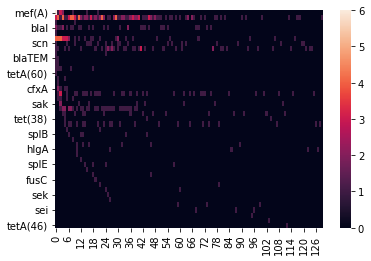

In [18]:
sns.heatmap(amr_sample)